In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [6]:
# Data Manipulation & Summarisation
import numpy as np 
from numpy import sqrt, abs, round
import pandas as pd

# debugging imports
from IPython import embed
import pdb

# Data Visualisation
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
color = sns.color_palette()
# %matplotlib inline

# Regex for working with text features
import re

# Datetime for working with datetime features
from datetime import timedelta, date

# Modules required for statistical tests
from scipy.stats import norm
from scipy.stats import t as t_dist
from scipy.stats import chi2_contingency

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
! ls -ltr ../input/creditcardfraud

total 147296
-rw-r--r-- 1 nobody nogroup 150828752 Nov 18 10:51 creditcard.csv


In [8]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.columns # dependent var / target / label is 'Class'

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Exploratory Data Analysis (EDA)
* Let's get a sense of the data.
* Check for NaNs and imputing them accordingly.
* Outlier detection.
* Univaritate + Bivariate Analysis.
* Mostly likely this is a unbalanced dataset.

In [10]:
# let's check for any missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

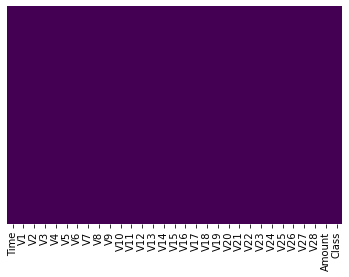

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

From the above info() plus heatmap for isnull(), the dataset has no missing values. Let's next take a look at the target variable - **Class**

Text(0.5, 1.0, 'Class Count: Fraud (1) and Not Fraud (0)')

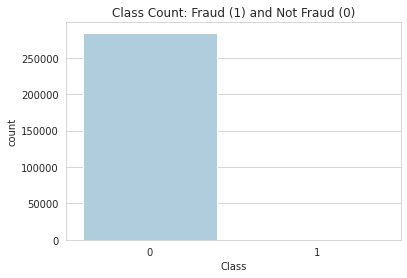

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Class',data=df, palette='RdBu_r')
plt.title("Class Count: Fraud (1) and Not Fraud (0)")

In [13]:
df['Class'].value_counts() # heavily unbalanced, with only 492 out of 284,315 being fraudu

0    284315
1       492
Name: Class, dtype: int64

We will deal with the unbalanced data via undersampling and oversampling of the minority class later in this notebook.

Text(0.5, 1.0, 'Dist of Transaction Amount')

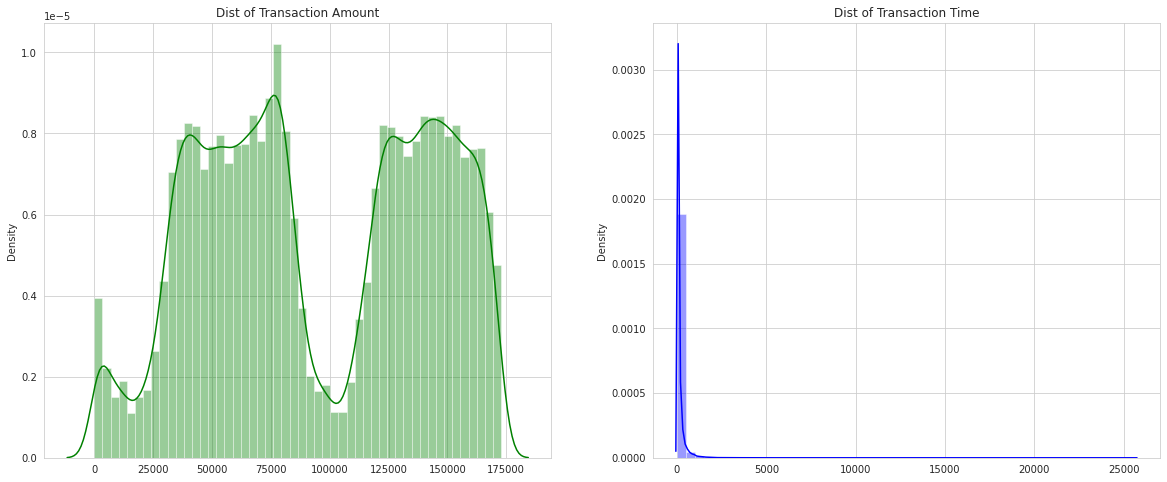

In [14]:
fix, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.distplot(df['Amount'].values, ax=ax[1], color='b')
ax[1].set_title('Dist of Transaction Time')
sns.distplot(df['Time'].values, ax=ax[0], color='g')
ax[0].set_title('Dist of Transaction Amount')

We will use StandardScaller() to scale both features plotted above. Note all the other V features are also scaled.

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()
# rob_scaler expect 2D array; hence, we are reshaping and adding an extra col dimension.
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [16]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
# move the scaled cols from the end to the front for ease of viewing.
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [17]:
not_fraud, fraud = df['Class'].value_counts()
not_fraud, fraud

(284315, 492)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

print('No Frauds', round(not_fraud/len(df) * 100,2), '% of the dataset')
print('Frauds', round(fraud/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [19]:
X_train = df.drop('Class', axis=1)
y_train = df['Class']

splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [20]:
splits.split(X_train, y_train) # this is a generator dataloader obj.

<generator object _BaseKFold.split at 0x7ff48722f9d0>

In [21]:
for train_index, test_index in splits.split(X_train, y_train):
    print("Train:", train_index, "Test:", test_index) # it'll shuffle this 5 times for 5 splits.
    # import pdb; pdb.set_trace()
    original_Xtrain, original_Xtest = X_train.iloc[train_index], X_train.iloc[test_index]
    original_ytrain, original_ytest = y_train.iloc[train_index], y_train.iloc[test_index]

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


Text(0.5, 1.0, 'Class Count: Fraud (1) and Not Fraud (0)')

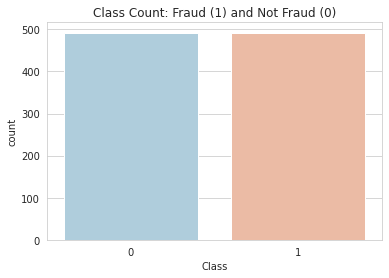

In [22]:
df = df.sample(frac=1) # shuffles dataframe
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492] # grab the same number of fraud samples
equal_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
undersample_df = equal_df.sample(frac=1, random_state=42)

sns.set_style('whitegrid')
sns.countplot(x='Class',data=undersample_df, palette='RdBu_r')
plt.title("Class Count: Fraud (1) and Not Fraud (0)")

## Identifying any Correlations
* Sweep all features against **Class** and identify independent variables that are storngly corr() to the target.

<AxesSubplot:>

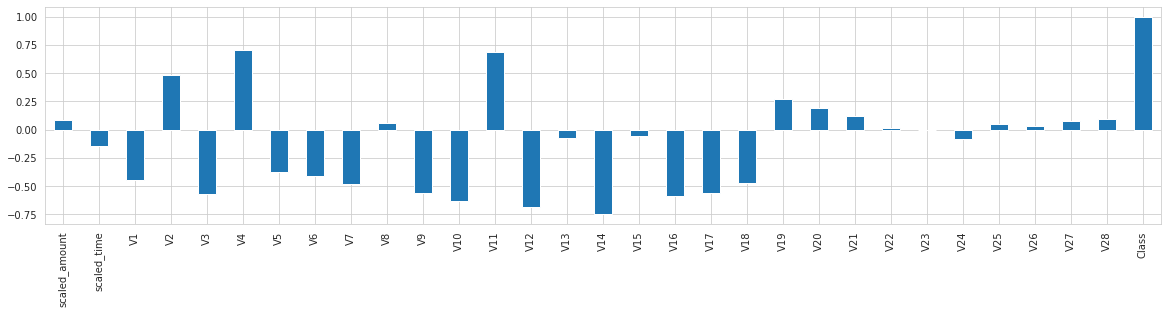

In [23]:
undersample_df.corr()['Class'].plot(kind='bar', style='k--', label='Series', grid=True, figsize=(20, 4)) 

We see Several possitve correlations, i.e. V2, V4, and V11 really stand out. The **higher** the value of the feature the more likely it is to be actually a fraud transaction.
We also see several negative correlations, which tell us the **lower** value of feature - the more it's like to be fraud.

## Outlier Detection
* Negatively corr() are V10, V12, and V14. Let's see if there are any outliers we can remove and are not important.
* We will need to double check if these distributions are normally distributed.

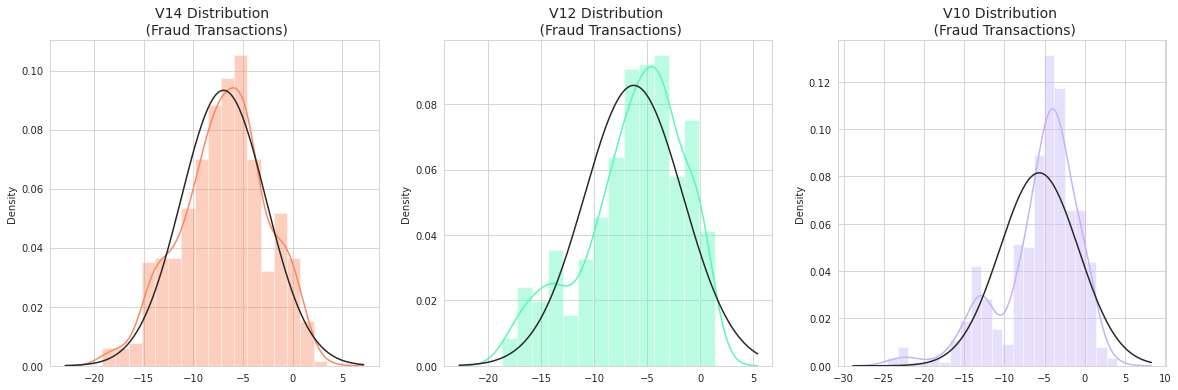

In [24]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = undersample_df['V14'].loc[undersample_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = undersample_df['V12'].loc[undersample_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = undersample_df['V10'].loc[undersample_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

Above look somewhat normally distributed, but more so for V14, where as V12 and V10 are not as convincing. Hence, we will use the concepts of quantiles instead - Interquartial range (**IQR**)
Boxplots here, will aid with visualizing the spread of data between 25th quartile and 75 quartile
Q1 - 1.5 * IQR and Q3 + 1.5 * IQR anything outside this range will be considered an outlier.
Why use this method, because it's agnostic of a distribution being Guassian.

In [25]:
# custom function for easy outlier analysis
def UVA_outlier(data, var_group, include_outlier = True):
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  ht = {} # hash table containing each feature and repective whiskers
  #looping for each variable
  for j,i in enumerate(var_group):
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)
    ht[i] = (whis_low, whis_high)
    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])
    
    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.boxplot(data[i], orient="v")
    plt.ylabel('{}'.format(i))
    plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                               round(IQR,2),
                                                                                               round(med,2),
                                                                                               (round(quant25,2),round(quant75,2)),
                                                                                               (outlier_low,outlier_high)
                                                                                               ))
  return ht

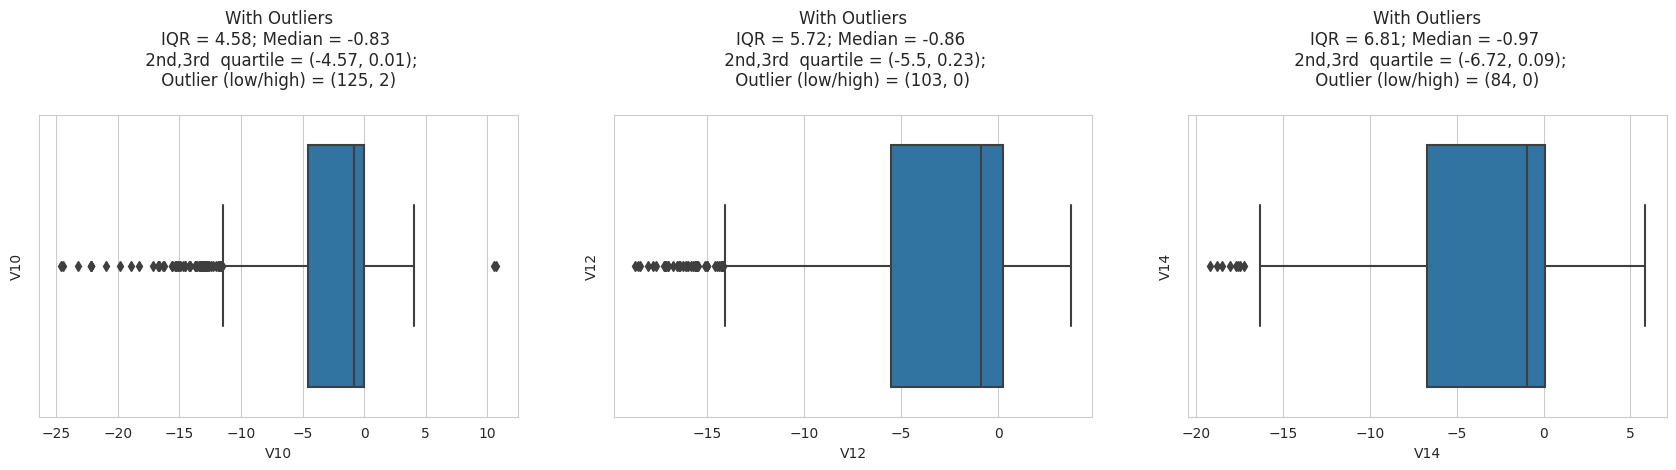

In [26]:
res_outliers = UVA_outlier(undersample_df, ['V10', 'V12', 'V14'])

From the above, we have several outliers that should we removed for every feature, i.e. they lie beyond the left and right whiskers.
* V10 has 122 low outliers and 5 high outliers.
* V12 has 109 low outliers 
* V14 has 82 low outliers.

In [27]:
res_outliers

{'V10': (-7.705873963100332, 6.0387630125651075),
 'V12': (-9.451049978698844, 7.723509520018972),
 'V14': (-11.18561675359683, 9.251821858413978)}

In [28]:
# let us remove the outliers from the said features above.
cleaned_df = undersample_df.drop(undersample_df[(undersample_df['V10'] < res_outliers['V10'][0]) | (undersample_df['V10'] > res_outliers['V10'][1])].index)

In [29]:
cleaned_df = cleaned_df.drop(cleaned_df[(cleaned_df['V12'] < res_outliers['V12'][0]) | (cleaned_df['V12'] > res_outliers['V12'][1])].index)
cleaned_df = cleaned_df.drop(cleaned_df[(cleaned_df['V14'] < res_outliers['V14'][0]) | (cleaned_df['V14'] > res_outliers['V14'][1])].index)

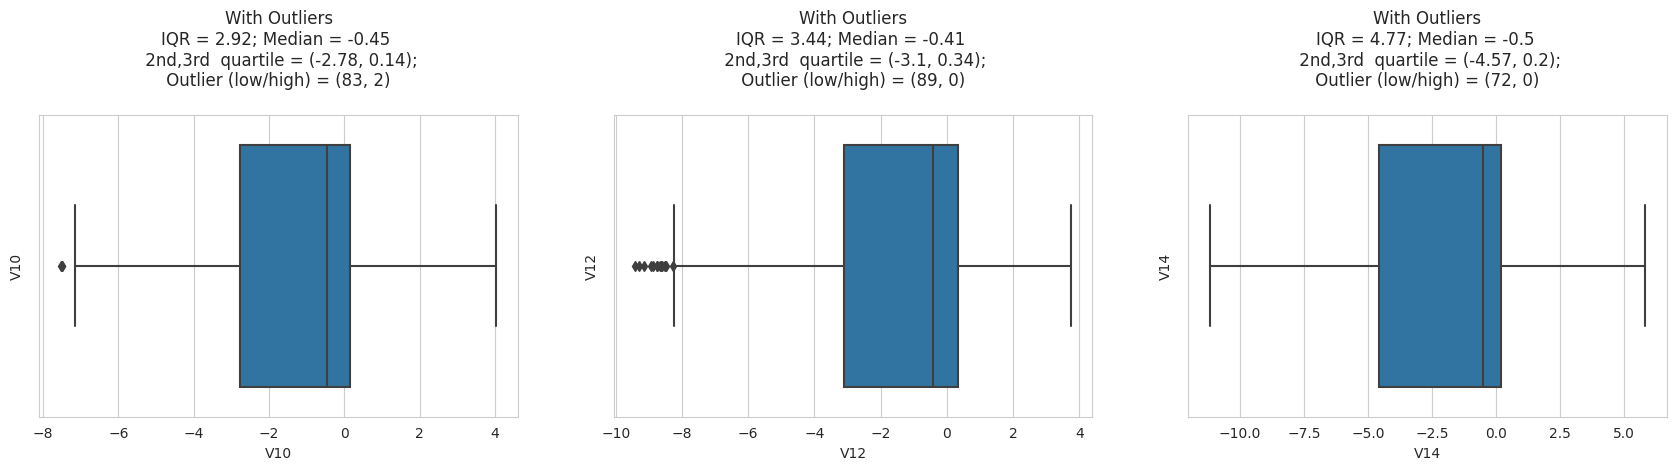

In [30]:
res_outliers = UVA_outlier(cleaned_df, ['V10', 'V12', 'V14']) # as we can see, we were able to remove the outliers, there are fewer beyond the whiskers now.

In [33]:
cleaned_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
10957,-0.222176,-0.773752,1.030448,0.159661,1.631821,2.767468,-0.602779,0.958149,-0.909833,0.440457,...,-0.298684,-0.168951,-0.162079,0.084125,-0.089380,0.125728,-0.065541,0.019363,0.013873,0
143728,-0.293440,0.010350,-1.756712,3.266574,-4.153388,3.924526,-1.753772,-1.005787,-4.313217,1.560712,...,0.874720,0.911427,0.053061,-0.367701,-0.776338,0.292094,0.026000,1.062968,0.501148,1
41894,-0.251520,-0.514773,1.319200,0.080622,0.141068,0.232626,-0.133907,-0.406402,0.001200,-0.151563,...,-0.041369,-0.296493,-0.702970,-0.046666,-0.407806,0.457443,0.495907,-0.040402,0.003130,0
48094,0.040523,-0.484005,-1.278138,0.716242,-1.143279,0.217805,-1.293890,-1.168952,-2.564182,0.204532,...,0.817203,0.490183,0.470427,-0.126261,-0.126644,-0.661908,-0.349793,0.454851,0.137843,1
193961,-0.279746,0.536696,2.045931,-0.169231,-1.223932,0.216702,0.033280,-0.684640,0.019908,-0.117965,...,-0.251067,-0.272208,-0.723428,0.288901,-0.428234,-0.303311,0.205297,-0.080276,-0.075739,0


## Model Building

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import Imputer
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [43]:
# Undersampling before cross validating (prone to overfit) - makes sense becuase smaller dataset.
X = cleaned_df.drop('Class', axis=1)
y = cleaned_df['Class']

In [44]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [46]:
# Woah our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 92.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 91.0 % accuracy score
Classifiers:  SVC Has a training score of 91.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 88.0 % accuracy score
